In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/drive/MyDrive/Data Science/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [2]:
education_map = {
    1: 'Below College', 2: 'College', 3: 'Bachelor',
    4: 'Master', 5: 'Doctor'
}
df['Education'] = df['Education'].map(education_map)

In [3]:
df['Attrition'].value_counts(normalize=True)

,proportion
Attrition,
No,0.838776
Yes,0.161224


In [4]:
avg_tenure = df['YearsAtCompany'].mean()

<Axes: xlabel='count', ylabel='Department'>

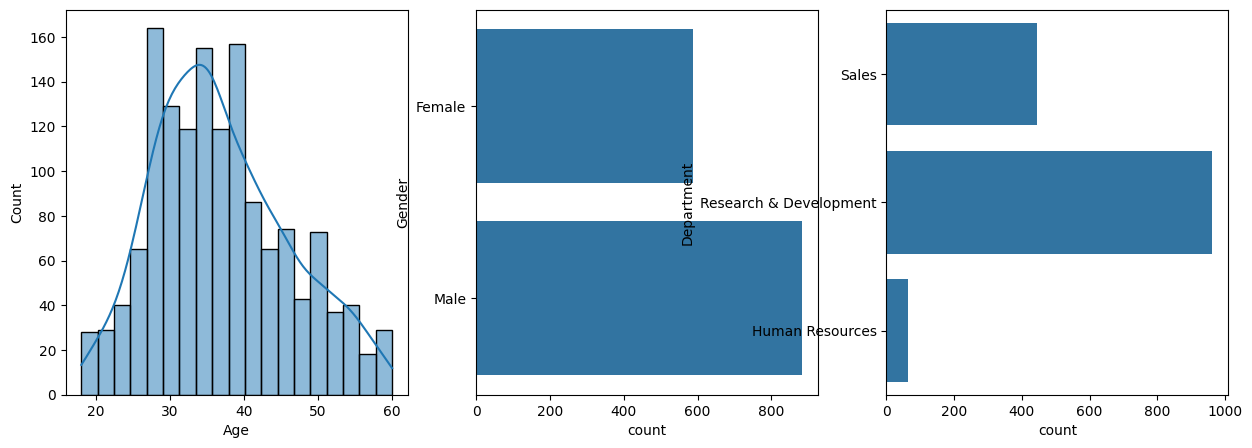

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['Age'], kde=True, ax=axes[0])
sns.countplot(df['Gender'], ax=axes[1])
sns.countplot(df['Department'], ax=axes[2])

Text(0.5, 1.0, 'Distance From Home by Job Role and Attrition')

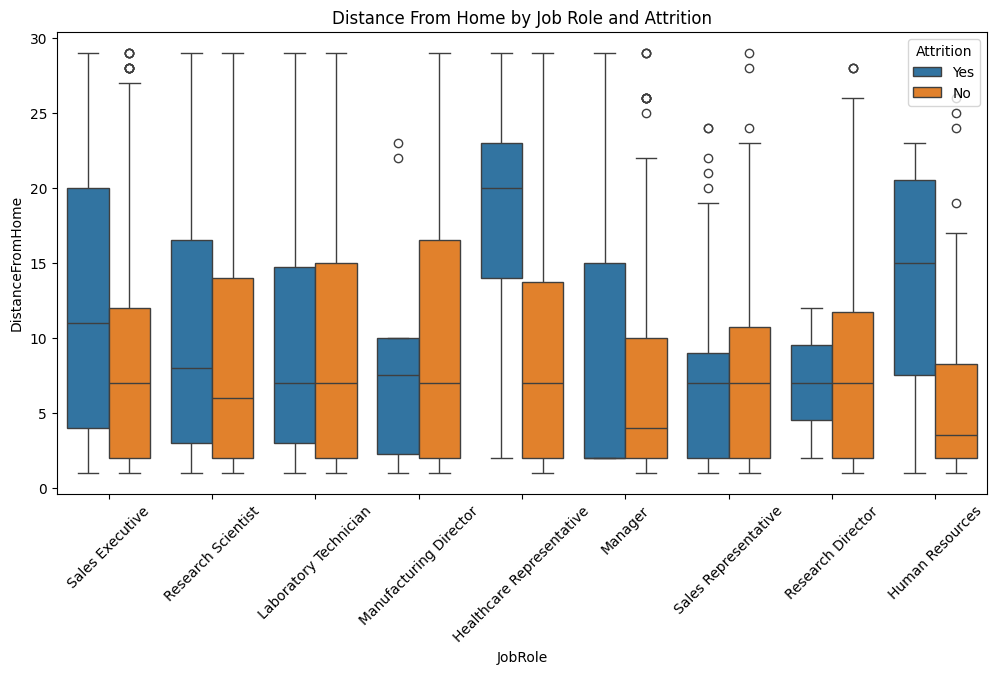

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(x='JobRole', y='DistanceFromHome', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title('Distance From Home by Job Role and Attrition')

Text(0.5, 1.0, 'Avg Monthly Income by Education and Attrition')

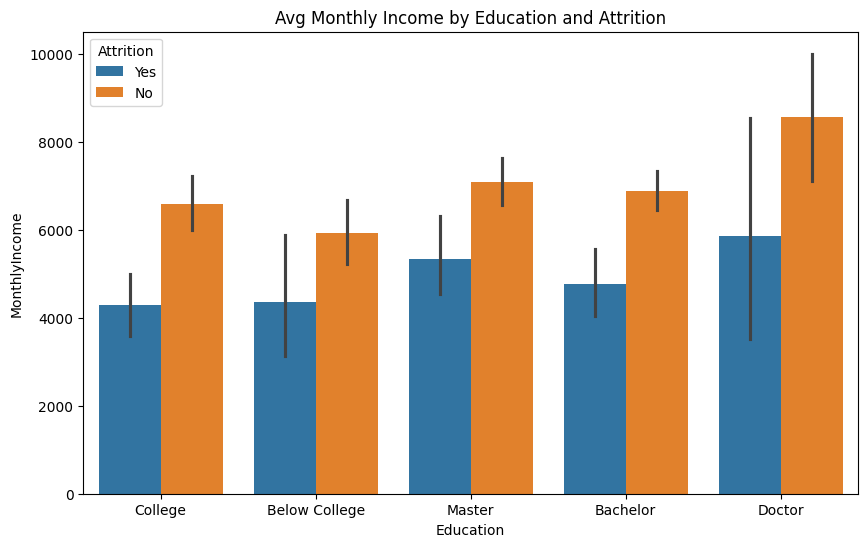

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Education', y='MonthlyIncome', hue='Attrition')
plt.title('Avg Monthly Income by Education and Attrition')

Text(0.5, 1.0, 'Correlation Matrix')

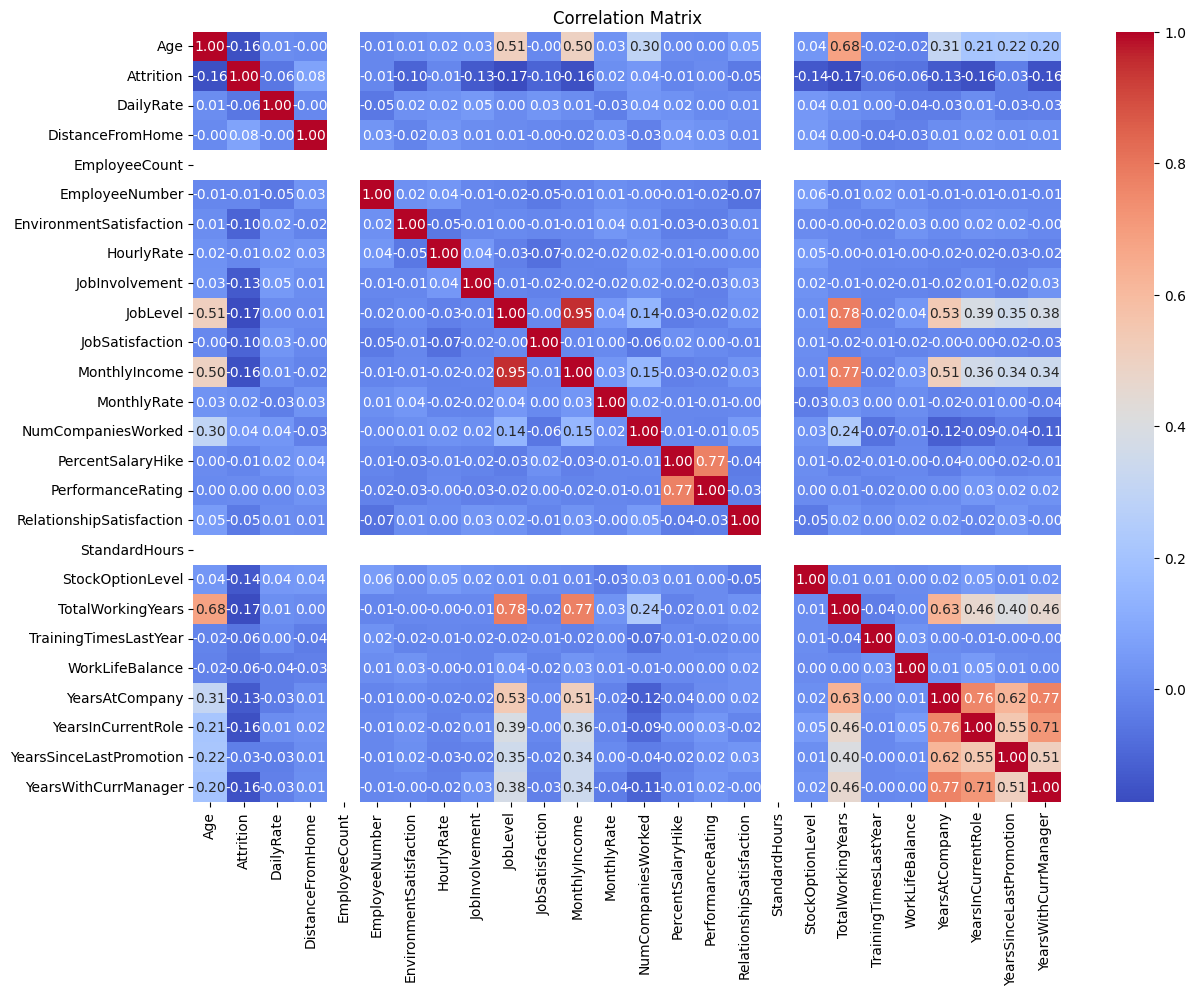

In [9]:
plt.figure(figsize=(14,10))

# Convert 'Attrition' to numerical values
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Select features (X) and target (y)
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      0.83       294

